# Fetching OHLC of Indian f&O stocks

In [176]:
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [177]:
import yfinance as yf

hdfc = yf.Ticker("HDFCBANK.NS")

## using yfinamce to fetch the ohlc data

# get stock info
print(hdfc.info)

# get historical market data
data = hdfc.history(period="2y")

{'address1': 'HDFC Bank House', 'address2': 'Senapati Bapat Marg Lower Parel (W)', 'city': 'Mumbai', 'zip': '400013', 'country': 'India', 'phone': '91 22 6652 1000', 'fax': '91 22 2496 0737', 'website': 'https://www.hdfcbank.com', 'industry': 'Banks—Regional', 'industryDisp': 'Banks—Regional', 'sector': 'Financial Services', 'longBusinessSummary': 'HDFC Bank Limited provides banking and financial services to individuals and businesses in India, Bahrain, Hong Kong, and Dubai. It operates in Treasury, Retail Banking, Wholesale Banking, Other Banking Business, and Unallocated segments. The company accepts savings, salary, current, rural, public provident fund, pension, and Demat accounts; fixed and recurring deposits; and safe deposit lockers, as well as offshore accounts and deposits, overdrafts against fixed deposits, and sweep-in facilities. It also provides personal, home, car, two wheeler, business, educational, gold, consumer, and rural loans; loans against properties, securities, r

In [178]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-06-23 00:00:00+05:30,1449.900378,1457.490508,1438.807157,1445.521484,3922434,0.0,0.0
2021-06-24 00:00:00+05:30,1449.900462,1472.719318,1447.954287,1465.713135,7392512,0.0,0.0
2021-06-25 00:00:00+05:30,1470.432601,1481.039279,1466.442966,1474.324951,5191588,0.0,0.0
2021-06-28 00:00:00+05:30,1479.093086,1482.012348,1464.496772,1467.756592,4678393,0.0,0.0
2021-06-29 00:00:00+05:30,1472.789609,1473.962320,1458.276742,1467.952026,5485846,6.5,0.0


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 498 entries, 2021-06-23 00:00:00+05:30 to 2023-06-23 00:00:00+05:30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          498 non-null    float64
 1   High          498 non-null    float64
 2   Low           498 non-null    float64
 3   Close         498 non-null    float64
 4   Volume        498 non-null    int64  
 5   Dividends     498 non-null    float64
 6   Stock Splits  498 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.1 KB


In [180]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt

# Top 5 stocks for Using 52 weeks moving rolling returns

In [181]:



stocks = stock_names = ["RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "HINDUNILVR.NS", "HDFC.NS", "SBIN.NS", "BAJFINANCE.NS", "ICICIBANK.NS",
                        "LT.NS", "AXISBANK.NS", "MARUTI.NS", "ITC.NS", "KOTAKBANK.NS", "M&M.NS", "ASIANPAINT.NS", "TITAN.NS", "SUNPHARMA.NS", "WIPRO.NS", "ULTRACEMCO.NS"]


## Fetching data for 20 F&O stocks from Indian Stock Market

stock_data = {}


for symbol in stocks:

    stock = yf.Ticker(symbol)


    data = stock.history(period="1y")
    stock_data[symbol] = data


print(stock_data["HDFCBANK.NS"])


                                  Open         High          Low        Close  \
Date                                                                            
2022-06-23 00:00:00+05:30  1315.414904  1332.716491  1303.550959  1320.012207   
2022-06-24 00:00:00+05:30  1323.373709  1346.211779  1323.373709  1338.450806   
2022-06-27 00:00:00+05:30  1354.467151  1360.399124  1336.671233  1340.873047   
2022-06-28 00:00:00+05:30  1328.761899  1335.682534  1323.225415  1330.640381   
2022-06-29 00:00:00+05:30  1316.156442  1335.435353  1316.156442  1328.712402   
...                                ...          ...          ...          ...   
2023-06-19 00:00:00+05:30  1611.000000  1614.250000  1598.349976  1604.150024   
2023-06-20 00:00:00+05:30  1604.150024  1611.000000  1590.650024  1607.500000   
2023-06-21 00:00:00+05:30  1616.000000  1637.250000  1611.000000  1635.599976   
2023-06-22 00:00:00+05:30  1640.000000  1657.550049  1639.050049  1643.599976   
2023-06-23 00:00:00+05:30  1

In [182]:
def get_top_performers(data_dict):
    top_performers = {}

    for symbol, data in data_dict.items():
        # Calculate the 52-week rolling returns
        rolling_returns = data['Close'].pct_change(52).dropna()

        # Sort the rolling returns in descending order
        sorted_returns = rolling_returns.sort_values(ascending=False)

        # Get the top 5 performers
        print(symbol)
        top_performers[symbol] = sorted_returns.head(1)

    return top_performers

In [183]:
def extract(series):
    date = series.index[0]
    value = series.values[0]
    return value

In [185]:
for symbol, performers in top_performers.items():
    print("Symbol:", symbol)

Symbol: BAJFINANCE.NS
Symbol: LT.NS
Symbol: ICICIBANK.NS
Symbol: KOTAKBANK.NS
Symbol: INFY.NS


In [186]:
from itertools import islice

sorted_data = dict(sorted(top_performer.items(), key=lambda x: x[1], reverse=True))

In [187]:
sorted_data

{'BAJFINANCE.NS': 0.3677066576590131,
 'LT.NS': 0.3382079350178868,
 'ICICIBANK.NS': 0.31427883927321676,
 'KOTAKBANK.NS': 0.203387266985104,
 'INFY.NS': 0.2024253261692035,
 'HDFCBANK.NS': 0.1962504797126532,
 'MARUTI.NS': 0.1810185971744842,
 'RELIANCE.NS': 0.15335389925263265,
 'HINDUNILVR.NS': 0.15131296261225935,
 'TCS.NS': 0.14602675377436403}

In [188]:
top_5 = dict(list(sorted_data.items())[:5])

In [189]:
def convert(dictionary):
    for key in dictionary:
        dictionary[key] = dictionary[key]  * 100

    return dictionary
percent = convert(top_5)

In [190]:
percent

{'BAJFINANCE.NS': 36.77066576590131,
 'LT.NS': 33.820793501788685,
 'ICICIBANK.NS': 31.427883927321677,
 'KOTAKBANK.NS': 20.3387266985104,
 'INFY.NS': 20.24253261692035}

In [191]:
def plot_histogram(dictionary):
    values = list(dictionary.values())
    keys = list(dictionary.keys())

    plt.bar(keys, values)
    plt.xlabel('Keys')
    plt.ylabel('Values')
    plt.title('Histogram of Dictionary Values')
    plt.show()

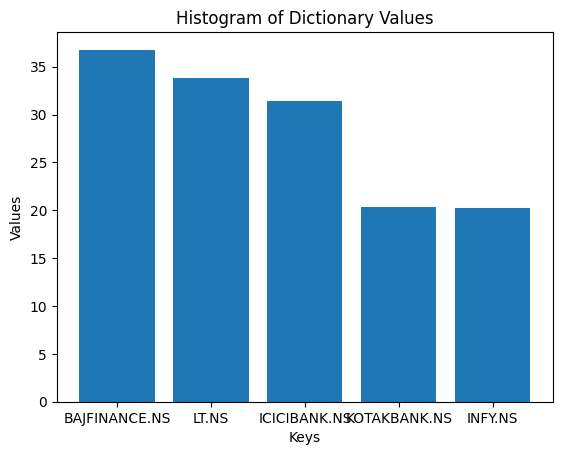

In [192]:
plot_histogram(percent)

In [193]:
top = [];
for key,value in top_5.items():
  top.append(key)
top

['BAJFINANCE.NS', 'LT.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'INFY.NS']

In [194]:
def plot(stock_data,top):
  for symbol in top:
    for symbol,data in stock_data[symbol]:
      plt.plot(data['lose'])
      plt.xlabel('Index')
      plt.ylabel('Closing Price')
      plt.title('Index vs. Closing Price')

In [195]:
import matplotlib.pyplot as plt

def plot(stock_data, top):
    num_plots = len(top)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    fig.suptitle('Stock Closing Prices')

    for i, symbol in enumerate(top):
        data = stock_data[symbol]
        row = i // num_cols
        col = i % num_cols
        axes[row, col].plot(data['Close'])
        axes[row, col].set_title(f'Stock: {symbol}')
        axes[row, col].set_xlabel('Index')
        axes[row, col].set_ylabel('Closing Price')


    if num_plots % num_cols != 0:
        for i in range(num_plots, num_rows * num_cols):
            fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()


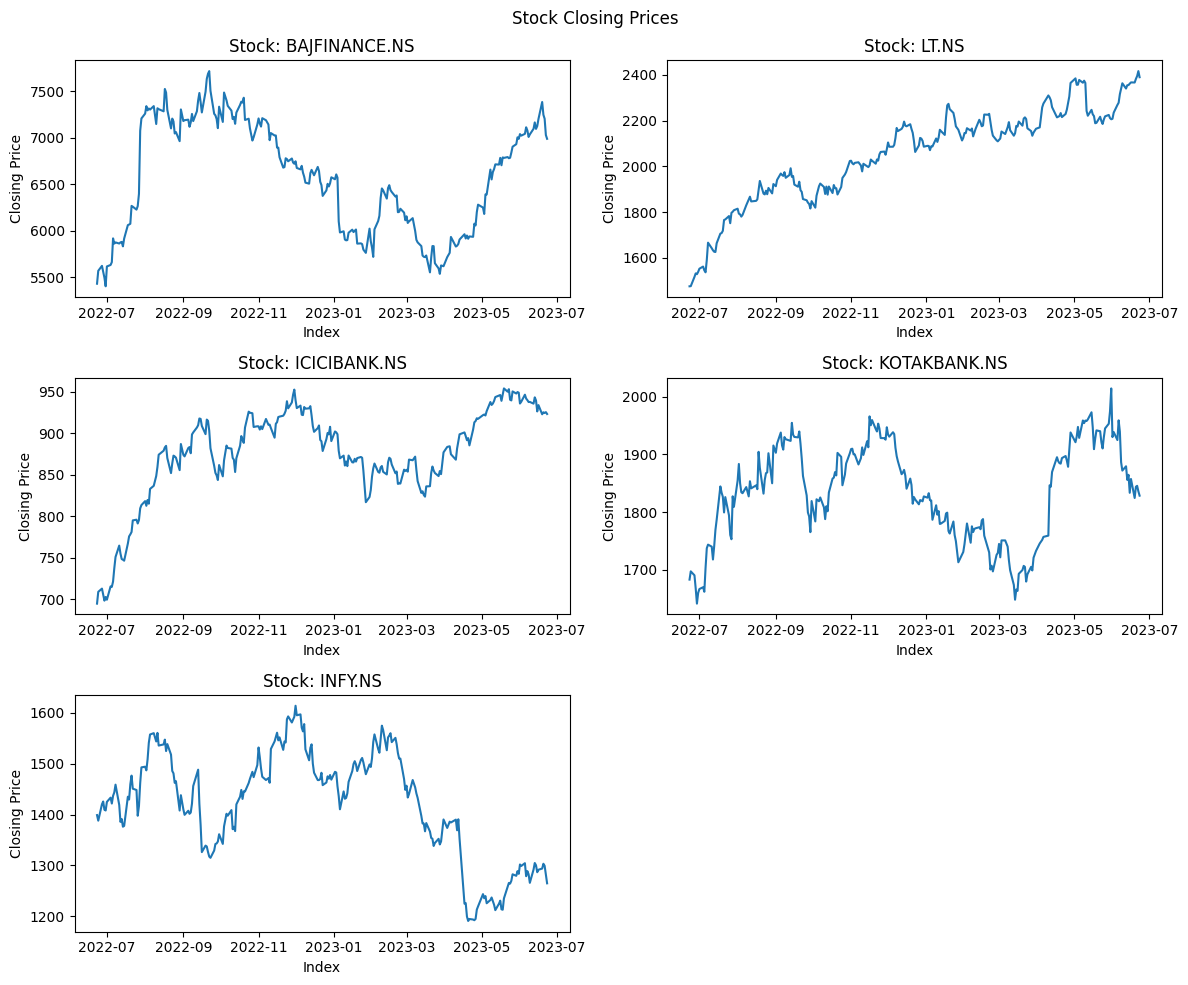

In [196]:
plot(stock_data,top)

In [197]:
import matplotlib.pyplot as plt

def plot(stock_data, top):
    num_plots = len(top)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    fig.suptitle('Stock Closing Prices and EMAs')

    for i, symbol in enumerate(top):
        data = stock_data[symbol]
        row = i // num_cols
        col = i % num_cols


        axes[row, col].plot(data['Close'], label='Closing Price')

       # EMAs
        ema10 = data['Close'].ewm(span=10, adjust=False).mean()
        ema20 = data['Close'].ewm(span=20, adjust=False).mean()
        ema50 = data['Close'].ewm(span=50, adjust=False).mean()

        axes[row, col].plot(ema10, label='EMA 10')
        axes[row, col].plot(ema20, label='EMA 20')
        axes[row, col].plot(ema50, label='EMA 50')

        axes[row, col].set_title(f'Stock: {symbol}')
        axes[row, col].set_xlabel('Index')
        axes[row, col].set_ylabel('Price')
        axes[row, col].legend()


    if num_plots % num_cols != 0:
        for i in range(num_plots, num_rows * num_cols):
            fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()


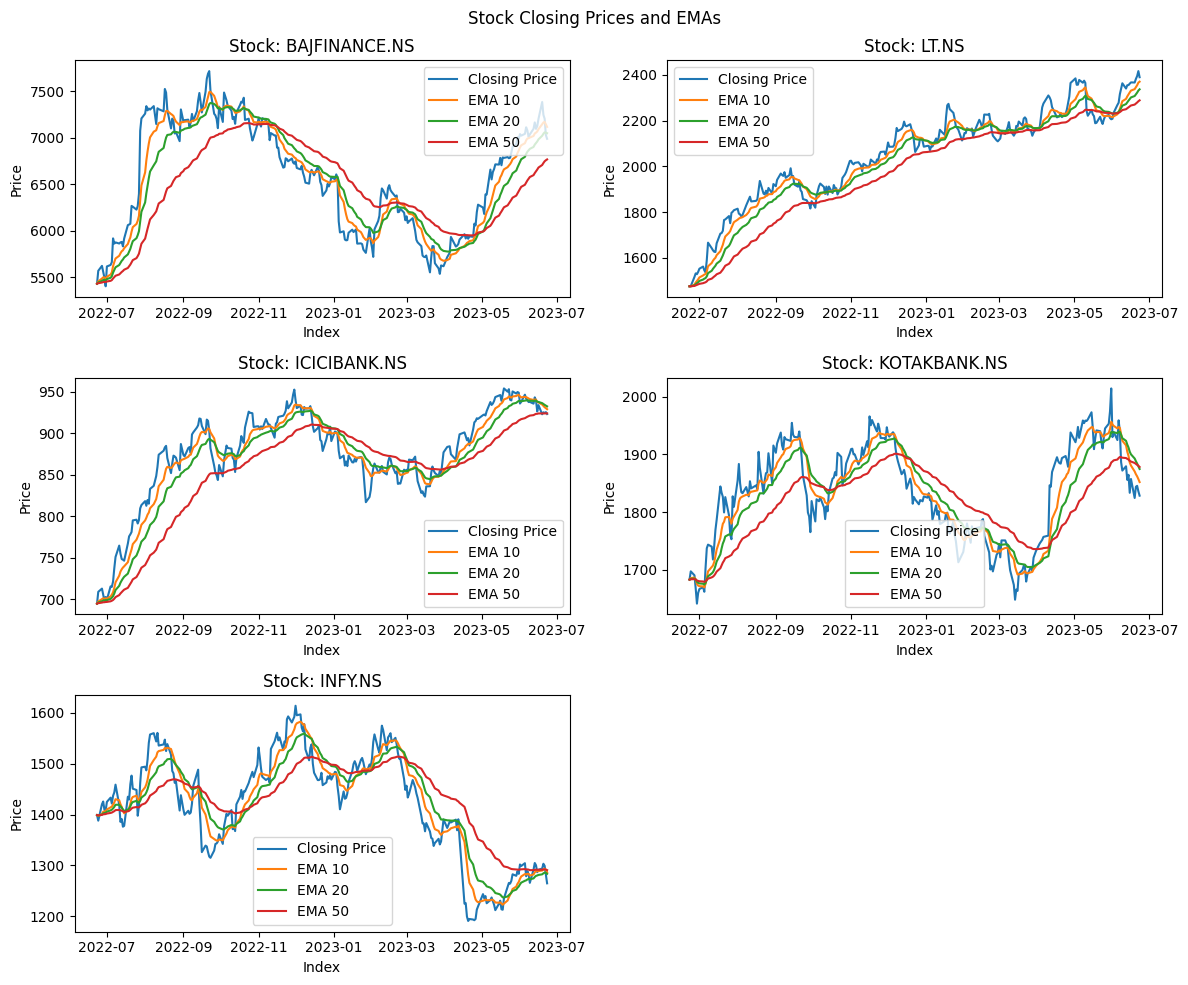

In [198]:
plot(stock_data,top)

# AVERAGE TRUE RANGE (ATR)
The Average True Range (ATR) is a technical indicator that measures the volatility of a financial instrument.

- TR = max(High - Low, abs(High - Previous Close), abs(Low - Previous Close)) , ATR = Average(TR)

- Using Atr to control to stoploss to go long on the top5 performers

In [199]:
def calculate_atr(data, period=14):
    high = data['High']
    low = data['Low']
    close = data['Close']

    tr1 = high - low
    tr2 = abs(high - close.shift())
    tr3 = abs(low - close.shift())

    true_range = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    atr = true_range.rolling(window=period).mean()

    return atr

In [200]:
atr = calculate_atr(data)


In [201]:
atr[14]

117.01400864012074

BAJFINANCE.NS
LT.NS
ICICIBANK.NS
KOTAKBANK.NS
INFY.NS
nan


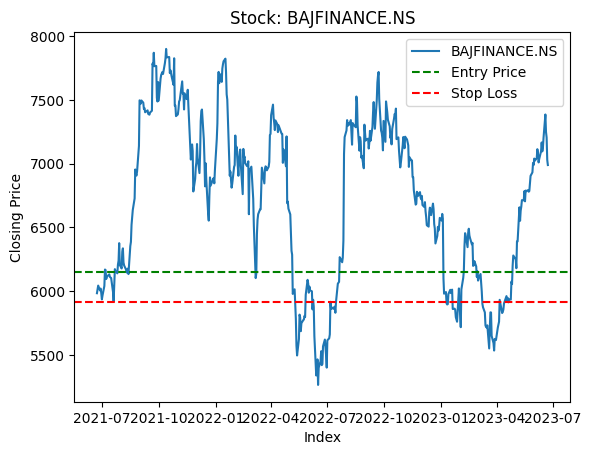

nan


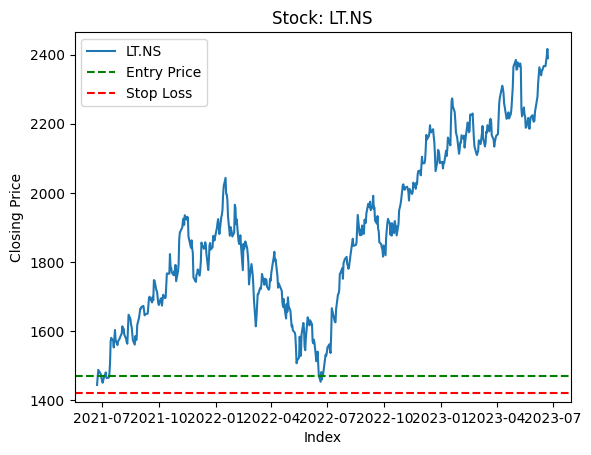

nan


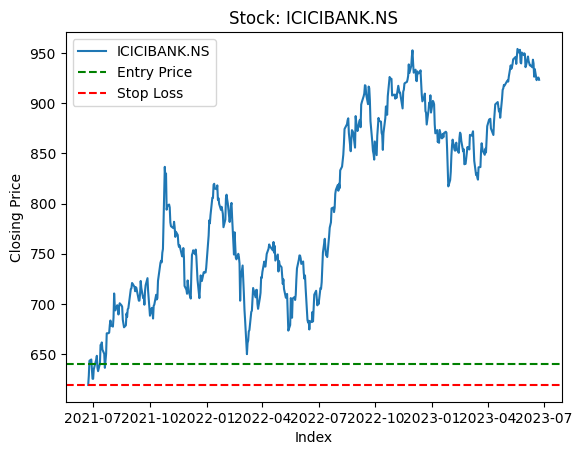

nan


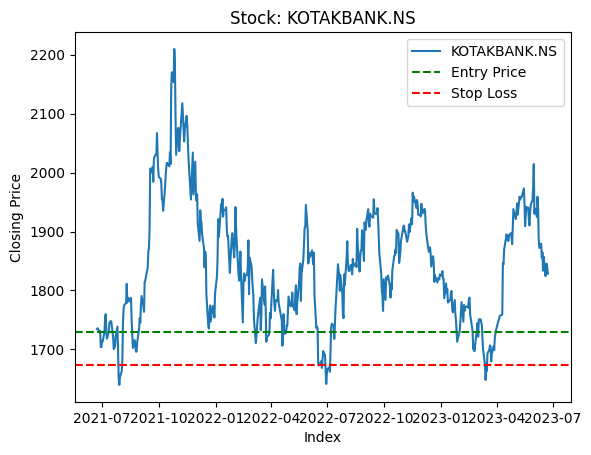

nan


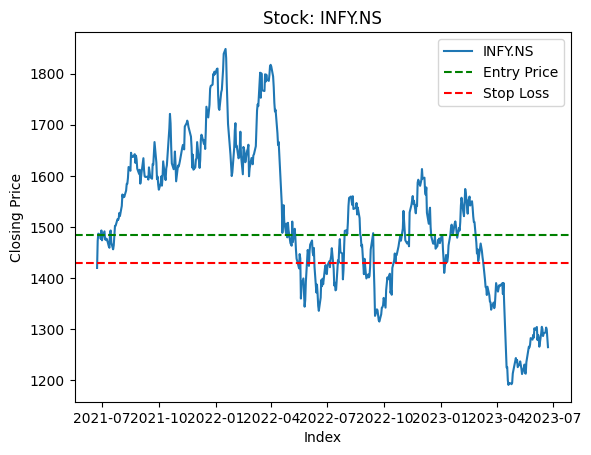

In [202]:

def go_long_with_stop_loss(stock_data, top_performers, stop_loss_multiplier):
    for symbol in top_performers:
        data = stock_data[symbol]


        atr = calculate_atr(data) ## ATR is calculated using the above function

        entry_price = data['Open'][13]   ## Entry Price and StopLoss
        stop_loss = entry_price - (stop_loss_multiplier * atr[13])
        print(atr[0])


        plt.plot(data['Close'], label=symbol)
        plt.axhline(entry_price, linestyle='--', color='g', label='Entry Price')
        plt.axhline(stop_loss, linestyle='--', color='r', label='Stop Loss')
        plt.xlabel('Index')
        plt.ylabel('Closing Price')
        plt.title(f'Stock: {symbol}')
        plt.legend()
        plt.show()

symbols = top

stock_data = {}
for symbol in symbols:
    stock = yf.Ticker(symbol)
    stock_data[symbol] = stock.history(period='2y')

top_performers = get_top_performers(stock_data)
go_long_with_stop_loss(stock_data, top_performers, stop_loss_multiplier=2)

# Rebalancing the Stock on weekly basis

In [203]:

import pandas as pd
import matplotlib.pyplot as plt

def rebalance_portfolio(stock_data, top_symbols, initial_weights):
    # Calculate 52-week rolling returns for each stock
    returns = {}
    for symbol in top_symbols:
        returns[symbol] = stock_data[symbol]['Close'].pct_change().rolling(window=52).sum()

    # Combine the returns into a single DataFrame
    returns_df = pd.DataFrame(returns)

    # Create a DataFrame to store the portfolio positions
    positions = pd.DataFrame(index=stock_data[next(iter(stock_data))].index, columns=top_symbols)

    # Create a DataFrame to store the weightage changes
    weightage_changes = pd.DataFrame(columns=top_symbols)

    # Rebalance the portfolio on a weekly basis
    for i, date in enumerate(positions.index):
        if i == 0:
            # Set initial weights
            positions.loc[date] = initial_weights
        else:
            # Rebalance the portfolio based on the top stocks
            portfolio_returns = returns_df.loc[date, top_symbols]
            portfolio_weights = portfolio_returns / portfolio_returns.sum()
            positions.loc[date] = portfolio_weights

        # Calculate weightage changes only when there is a change in positions
        if i > 0 and (positions.loc[date] != positions.loc[positions.index[i-1]]).any():
            weightage_changes.loc[date] = positions.loc[date] - positions.loc[positions.index[i-1]]

    # Plot the portfolio positions
    positions.plot(figsize=(10, 6))
    plt.xlabel('Date')
    plt.ylabel('Position')
    plt.title('Portfolio Positions')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    return weightage_changes




<ipython-input-203-0726ccc62cd7>:26: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  portfolio_returns = returns_df.loc[date, top_symbols]
<ipython-input-203-0726ccc62cd7>:26: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  portfolio_returns = returns_df.loc[date, top_symbols]
<ipython-input-203-0726ccc62cd7>:26: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  portfolio_returns = returns_df.loc[date, top_symbols]
<ipython-input-203-0726ccc62cd7>:26: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  portfolio_returns = returns_df.loc[date, top_symbols]
<ipython-input-203-0726ccc62cd7>:26: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  portfolio_returns =

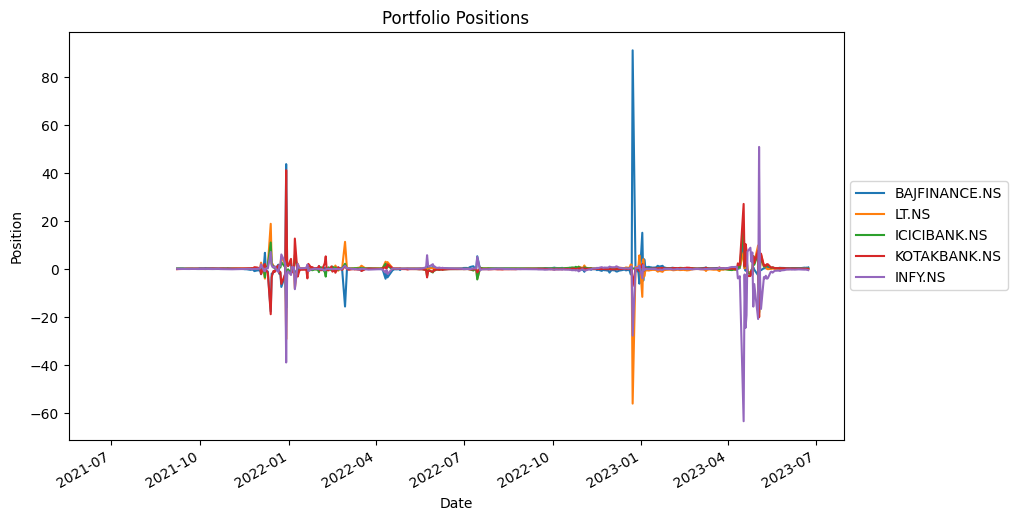

In [204]:

initial_weights = [0.2, 0.2, 0.2, 0.2, 0.2]

weightage_changes = rebalance_portfolio(stock_data, top_5, initial_weights)

In [205]:
weightage_changes.dropna(inplace = True)
weightage_changes

,BAJFINANCE.NS,LT.NS,ICICIBANK.NS,KOTAKBANK.NS,INFY.NS
2021-09-08 00:00:00+05:30,0.024789,-0.022372,0.004926,0.048945,-0.056287
2021-09-09 00:00:00+05:30,0.016974,-0.001356,-0.022989,0.013132,-0.005761
2021-09-13 00:00:00+05:30,0.007674,0.009004,-0.039025,0.021886,0.000460
2021-09-14 00:00:00+05:30,-0.046934,0.008148,0.009816,0.038371,-0.009401
2021-09-15 00:00:00+05:30,-0.018966,0.011038,0.021805,-0.009182,-0.004695
...,...,...,...,...,...
2023-06-19 00:00:00+05:30,0.160326,0.019547,-0.066193,-0.028098,-0.085581
2023-06-20 00:00:00+05:30,-0.065531,0.017795,-0.007524,0.012995,0.042265
2023-06-21 00:00:00+05:30,0.076244,-0.057061,0.017754,0.020943,-0.057879
2023-06-22 00:00:00+05:30,-0.046323,0.047632,0.073733,0.008090,-0.083132


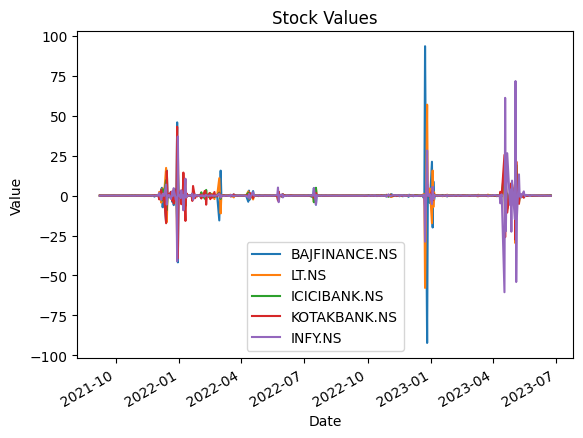

In [206]:
weightage_changes.plot()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Stock Values')
plt.legend()
plt.show()